<a href="https://colab.research.google.com/github/farhanbilawa/PAP/blob/main/PMAA(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Rajarshi Ray
# College : UEM Kolkata - Biotech
# Topic : Cross Validation performance using some classification models on Breast Cancer Dataset

# Kaggle Dataset Link : https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset?datasetId=3248517&sortBy=dateRun&tab=profile

##Import Libraries for EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Upload Dataset and Analyse

In [16]:
%%bash

wget 'https://raw.githubusercontent.com/RajarshiRay25/ML_Datasets-Kaggle/main/6-Breast%20Cancer/brca.csv'

--2024-06-27 23:01:32--  https://raw.githubusercontent.com/RajarshiRay25/ML_Datasets-Kaggle/main/6-Breast%20Cancer/brca.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124888 (122K) [text/plain]
Saving to: ‘brca.csv.1’

     0K .......... .......... .......... .......... .......... 40% 3.95M 0s
    50K .......... .......... .......... .......... .......... 81% 3.86M 0s
   100K .......... .......... .                               100% 20.0M=0.03s

2024-06-27 23:01:32 (4.56 MB/s) - ‘brca.csv.1’ saved [124888/124888]



In [17]:
df = pd.read_csv('./brca.csv')
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [18]:
# Information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [19]:
# check null

df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [20]:
# Statistical description

df.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
# Shape

df.shape

(569, 32)

##Data Inference

*   Outcome : B --> Benign Stage Cancer
*   Outcome : M --> Malignant Stage Cancer



In [22]:
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [23]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

In [24]:
# See the outcome column

df.y

0      B
1      B
2      B
3      B
4      B
      ..
564    M
565    M
566    M
567    M
568    M
Name: y, Length: 569, dtype: object

In [25]:
df.y.value_counts()

y
B    357
M    212
Name: count, dtype: int64

In [26]:
# Outcome is categorical so we have to pre-process it

df['Outcome'] = pd.get_dummies(df.y,drop_first=True)
df.Outcome

0      False
1      False
2      False
3      False
4      False
       ...  
564     True
565     True
566     True
567     True
568     True
Name: Outcome, Length: 569, dtype: bool

In [27]:
df

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y,Outcome
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B,False
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B,False
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B,False
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B,False
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M,True
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M,True
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M,True
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M,True


## One Hot Encoding Inference

*   B (Benign) --> 0
*   M (Malignant) --> 1



In [28]:
df_final = df.drop([df.columns[0], 'y'], axis=1)

In [29]:
df_final.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,False
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,False
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,False
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,False
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,False


##Correlation Matrix and Graphical Analysis

In [30]:
data_correlation = df_final.corr()

In [31]:
data_correlation

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
x.radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
x.texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
x.perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
x.area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
x.smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
x.compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
x.concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
x.concave_pts_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
x.symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
x.fractal_dim_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<Axes: >

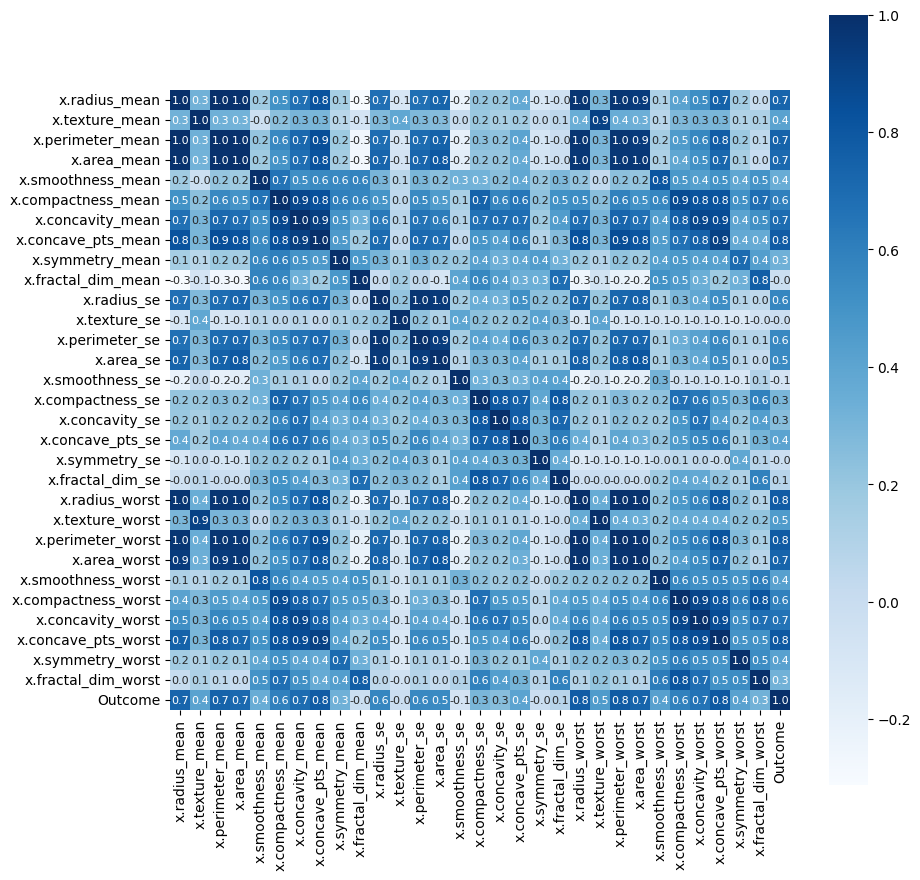

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

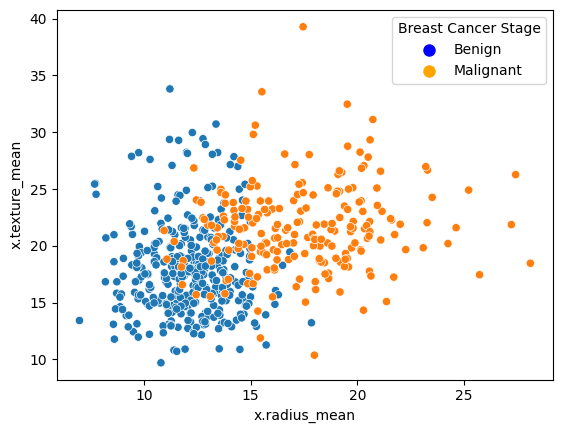

In [33]:
# Assuming 'Outcome' is the column indicating breast cancer stage
sns.scatterplot(x=df_final['x.radius_mean'], y=df_final['x.texture_mean'], hue=df_final['Outcome'])

# Customize legend
legend_labels = ['Benign', 'Malignant']
legend_markers = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10)]
plt.legend(legend_markers, legend_labels, title='Breast Cancer Stage')

plt.show()


<Axes: xlabel='Outcome', ylabel='count'>

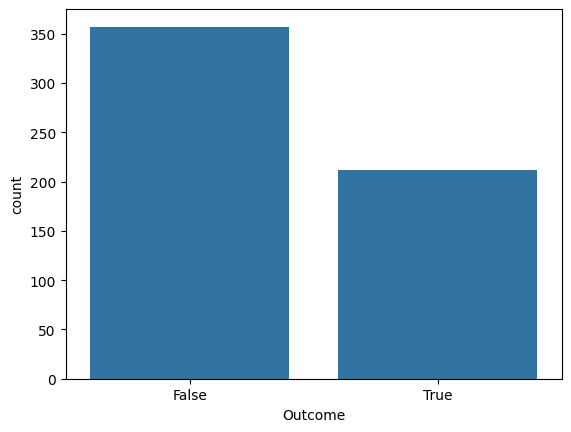

In [34]:
sns.countplot(x='Outcome',data=df_final)

## Analysing Distribution of various data on cancer outcomes

---

Box-Plot determines the interquantile range(IQR) of the data points and determines the 25 and 75 percentile values.
 We can also The "maximum" and "minimum" values, in the context you provided, are used to define the boundaries for detecting outliers based on the IQR:

Maximum: The maximum value is calculated as Q3 + 1.5 * IQR. Any data point above this value is considered a potential outlier.
Minimum: The minimum value is calculated as Q1 - 1.5 * IQR. Any data point below this value is considered a potential outlier.

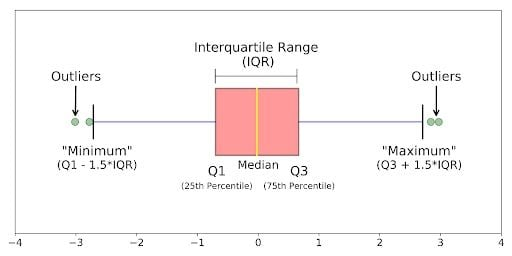

<Axes: xlabel='Outcome', ylabel='x.texture_mean'>

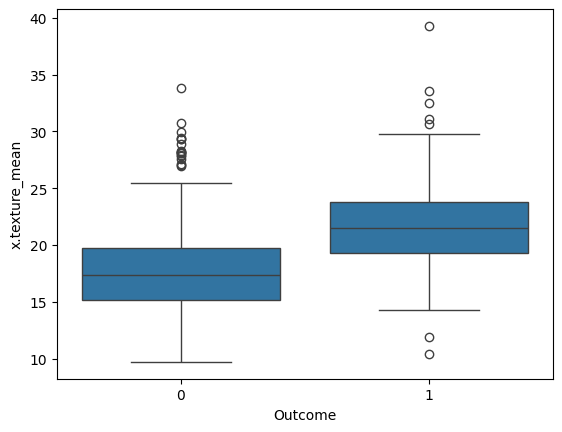

In [ ]:
sns.boxplot(x='Outcome',y='x.texture_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.radius_mean'>

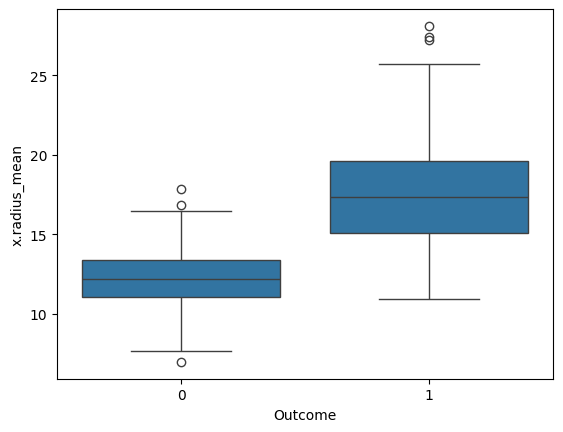

In [ ]:
sns.boxplot(x='Outcome',y='x.radius_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.perimeter_mean'>

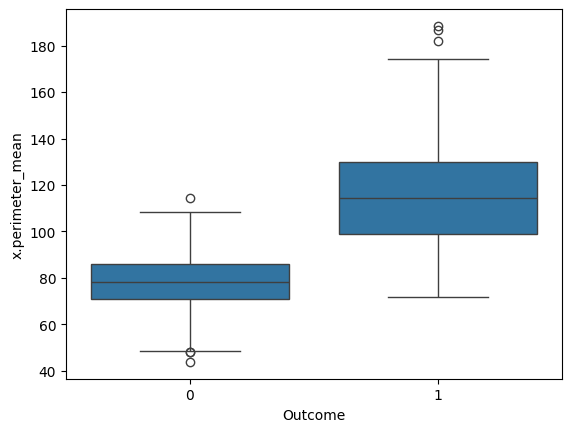

In [ ]:
sns.boxplot(x='Outcome',y='x.perimeter_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.area_mean'>

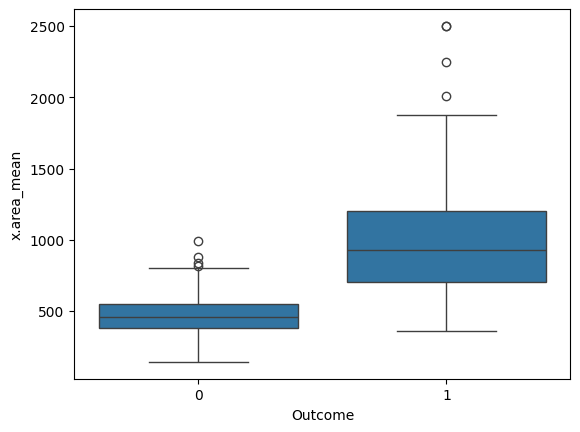

In [ ]:
sns.boxplot(x='Outcome',y='x.area_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.smoothness_mean'>

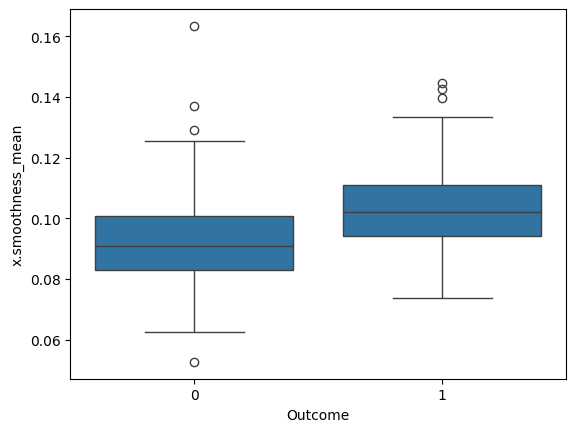

In [ ]:
sns.boxplot(x='Outcome',y='x.smoothness_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.concavity_mean'>

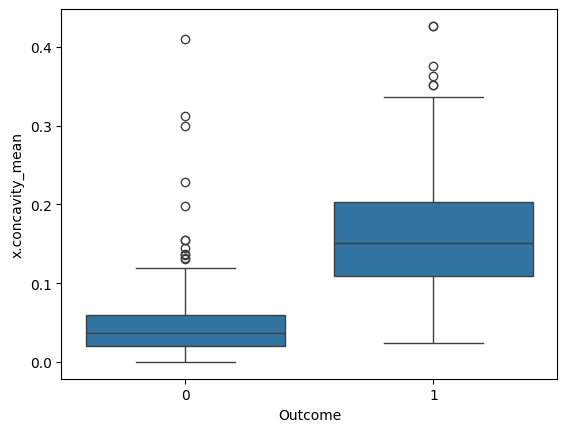

In [ ]:
sns.boxplot(x='Outcome',y='x.concavity_mean',data=df_final)

<ipython-input-27-5272463d9290>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['x.concavity_mean'])


<Axes: xlabel='x.concavity_mean', ylabel='Density'>

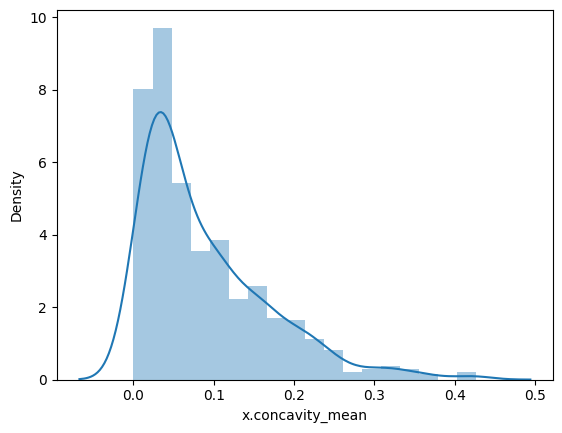

In [ ]:
sns.distplot(df_final['x.concavity_mean'])

## Outliers Processing using statistics IQR
---
1. Identify the numerical variables in your dataset for which you want to remove outliers. These are typically continuous variables that you suspect may contain outliers.

2. Calculate the quartiles (Q1 and Q3) for each numerical variable using the quantile() function. Quartiles divide the data into four equal parts, with Q1 representing the 25th percentile and Q3 representing the 75th percentile.

3. Compute the IQR (interquartile range) for each variable by subtracting Q1 from Q3. The IQR measures the spread of the data within the middle 50% of the distribution.

4. Define the lower and upper bounds for outliers by subtracting 1.5 times the IQR from Q1 and adding 1.5 times the IQR to Q3, respectively. This rule of thumb defines a range within which most of the data points are expected to fall, and points outside this range are considered outliers.

5. Iterate over each numerical variable in the dataset and filter out the outliers based on the defined bounds using boolean indexing. This step creates a subset of the data that only contains the non-outlier values.

6. Apply the desired action to the outliers. In the provided code, the outliers are effectively removed from the dataset since only the non-outlier values are retained.

7. Perform any necessary data validation and quality checks after the outlier removal process. This step ensures that the data is still valid and appropriate for further analysis.

In [35]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Iterate over each column
for col in df_final.columns:
  if col != 'Outcome':
    # Calculate quartiles for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Compute IQR for the column
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bound values
    df_final.loc[df[col] < lower_bound, col] = lower_bound
    df_final.loc[df[col] > upper_bound, col] = upper_bound


    # Print the bounds for the column
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("--------------------")


Column: x.radius_mean
Lower Bound: 5.579999999999999
Upper Bound: 21.9
--------------------
Column: x.texture_mean
Lower Bound: 7.725000000000003
Upper Bound: 30.244999999999997
--------------------
Column: x.perimeter_mean
Lower Bound: 31.775000000000013
Upper Bound: 147.49499999999998
--------------------
Column: x.area_mean
Lower Bound: -123.30000000000001
Upper Bound: 1326.3000000000002
--------------------
Column: x.smoothness_mean
Lower Bound: 0.057975
Upper Bound: 0.133695
--------------------
Column: x.compactness_mean
Lower Bound: -0.03329999999999997
Upper Bound: 0.22861999999999996
--------------------
Column: x.concavity_mean
Lower Bound: -0.12215000000000001
Upper Bound: 0.28241000000000005
--------------------
Column: x.concave_pts_mean
Lower Bound: -0.060224999999999994
Upper Bound: 0.15453499999999998
--------------------
Column: x.symmetry_mean
Lower Bound: 0.11119999999999995
Upper Bound: 0.24640000000000006
--------------------
Column: x.fractal_dim_mean
Lower Bound:

<Axes: xlabel='Outcome', ylabel='x.concavity_mean'>

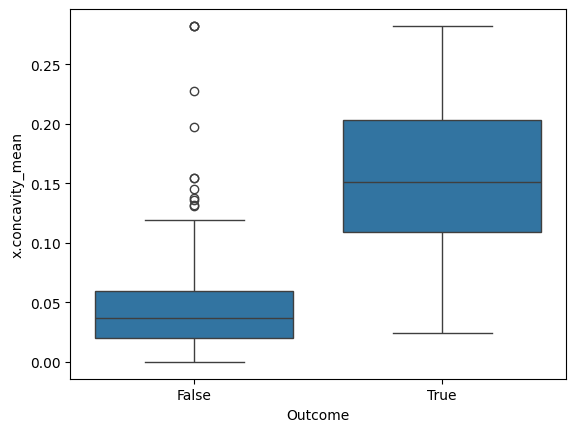

In [36]:
# Checking plots to ensure outlier removed

sns.boxplot(x='Outcome',y='x.concavity_mean',data=df_final)

<Axes: xlabel='Outcome', ylabel='x.smoothness_mean'>

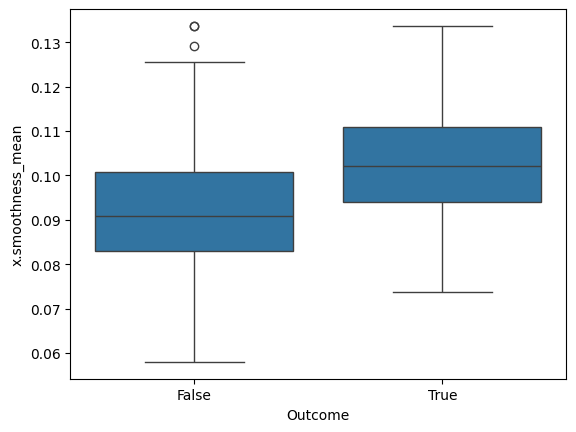

In [37]:
sns.boxplot(x='Outcome',y='x.smoothness_mean',data=df_final)

In [38]:
df_final.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,Outcome
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,False
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,False
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,False
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,False
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,False


##Using Classification Models to perform model building to determine breast cancer data

In [39]:
# importing models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [41]:
# Making X and y

X=df_final.drop(columns='Outcome',axis=1)
y=df_final['Outcome']

In [42]:
# Scale X

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled

array([[-0.15669817, -1.16991786, -0.17734812, ...,  0.21612292,
         0.18736059, -0.67289865],
       [-0.29454289, -0.84724694, -0.25682019, ..., -0.63610973,
         0.5719694 , -0.09464641],
       [-1.36613576, -1.62882762, -1.35509821, ..., -0.7969026 ,
        -0.79181258, -0.3512302 ],
       ...,
       [ 1.81807727,  2.15000743,  1.72216476, ...,  0.73382724,
        -0.56513492, -1.06215503],
       [ 0.76026888,  2.10937479,  0.72767814, ...,  0.41406869,
        -1.22287173, -0.32181693],
       [ 1.95891861,  2.40814417,  2.10866829, ...,  2.28998549,
         2.24975568,  2.48245611]])

In [44]:
y

0      False
1      False
2      False
3      False
4      False
       ...  
564     True
565     True
566     True
567     True
568     True
Name: Outcome, Length: 569, dtype: bool

In [46]:
# Initially using train test split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify = y, random_state=2)

In [47]:
# Dimension of X

print(X.shape,X_train.shape,X_test.shape)

(569, 30) (426, 30) (143, 30)


In [48]:
# Dimension of y

print(y.shape,y_train.shape,y_test.shape)

(569,) (426,) (143,)


In [49]:
from sklearn.neural_network import MLPClassifier # Import MLPClassifier for neural network

models_classification = [LogisticRegression(max_iter=4000),
                         SVC(kernel='linear'),
                         KNeighborsClassifier(),
                         RandomForestClassifier(),
                         MLPClassifier()]

In [50]:
# Declaring some values to get the most effective model from list

max_score = []
best_model = None
best_score = 0.0

# Looping through all models to perform prediction

for model in models_classification:

  model.fit(X_train,y_train)

  predict_data = model.predict(X_test)

  accuracy_level = accuracy_score(y_test,predict_data)

  f1 = f1_score(y_test, predict_data)
  precision = precision_score(y_test, predict_data)
  recall = recall_score(y_test, predict_data)


  max_score.append(round(accuracy_level,3))
  if accuracy_level > best_score:
      best_model = model
      best_score = accuracy_level

  print(f"Model used for classification is --> {model} & the accuracy score is --> {round(accuracy_level*100,2)}%")
  print(f"F1 Score: {round(f1,2)}, Precision: {round(precision,2)}, Recall: {round(recall,2)}")
  print("------------------------")

# Finalising the perfect model

print()
print(f"Model with the highest score --> {best_model}")
print(f"Highest score --> {round(best_score*100,2)}%")

Model used for classification is --> LogisticRegression(max_iter=4000) & the accuracy score is --> 96.5%
F1 Score: 0.95, Precision: 0.94, Recall: 0.96
------------------------
Model used for classification is --> SVC(kernel='linear') & the accuracy score is --> 95.8%
F1 Score: 0.94, Precision: 0.94, Recall: 0.94
------------------------
Model used for classification is --> KNeighborsClassifier() & the accuracy score is --> 95.1%
F1 Score: 0.93, Precision: 1.0, Recall: 0.87
------------------------
Model used for classification is --> RandomForestClassifier() & the accuracy score is --> 93.71%
F1 Score: 0.91, Precision: 0.94, Recall: 0.89
------------------------
Model used for classification is --> MLPClassifier() & the accuracy score is --> 95.8%
F1 Score: 0.94, Precision: 0.94, Recall: 0.94
------------------------

Model with the highest score --> LogisticRegression(max_iter=4000)
Highest score --> 96.5%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Performing Cross Validation

In [51]:
# Performin CV on SVM for testing
# Uses various variations of splitting number of cv times to give all combinations of accuracies

svm_cv = cross_val_score(SVC(kernel='linear'),X_scaled,y,cv=6)
print(svm_cv)

[0.98947368 0.95789474 0.97894737 0.97894737 0.98947368 0.9893617 ]


In [52]:
# Performing various functions on CV score list

mean_score_cv = sum(svm_cv)/len(svm_cv)
max_score_cv = max(svm_cv)

print(f"Mean score of CV --> {round(mean_score_cv*100,2)}%")
print(f"Max score of CV --> {round(max_score_cv*100,2)}%")

Mean score of CV --> 98.07%
Max score of CV --> 98.95%


In [53]:
# Performing CV for all models

models_classification_cv = [LogisticRegression(max_iter=4000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(), MLPClassifier()]

In [54]:
for model in models_classification_cv:

  cv_score_models = cross_val_score(model,X_scaled,y,cv=6)

  mean_score_models = sum(cv_score_models)/len(cv_score_models)
  max_score_models = max(cv_score_models)


  print(f"Model used --> {model} & CV scores --> {cv_score_models}")
  print(f"Model used --> {model} & mean CV score --> {round(mean_score_models*100,2)}%")
  print("-----------------------------------")

Model used --> LogisticRegression(max_iter=4000) & CV scores --> [0.98947368 0.95789474 0.97894737 0.96842105 0.98947368 1.        ]
Model used --> LogisticRegression(max_iter=4000) & mean CV score --> 98.07%
-----------------------------------
Model used --> SVC(kernel='linear') & CV scores --> [0.98947368 0.95789474 0.97894737 0.97894737 0.98947368 0.9893617 ]
Model used --> SVC(kernel='linear') & mean CV score --> 98.07%
-----------------------------------
Model used --> KNeighborsClassifier() & CV scores --> [0.95789474 0.95789474 0.98947368 0.96842105 0.94736842 0.96808511]
Model used --> KNeighborsClassifier() & mean CV score --> 96.49%
-----------------------------------
Model used --> RandomForestClassifier() & CV scores --> [0.94736842 0.92631579 0.96842105 0.96842105 0.95789474 0.9893617 ]
Model used --> RandomForestClassifier() & mean CV score --> 95.96%
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model used --> MLPClassifier() & CV scores --> [1.         0.96842105 0.96842105 0.97894737 0.98947368 0.9893617 ]
Model used --> MLPClassifier() & mean CV score --> 98.24%
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Hyper-paramter tuning with grid search CV and randomised search CV

### Tables below are taken from Google for referencing and documentation



| Algorithm | Hyperparameters | Definition | Range of Values |
|---|---|---|---|
| Logistic Regression | *C* | Regularization strength | 0.001 to 1000 |
| Support Vector Machines (SVM) | *Kernel* | Similarity measure | Linear, polynomial, RBF, sigmoid |
| *C* | Regularization strength | 0.001 to 1000 |
| *Gamma* | Width of decision boundary | 0.001 to 1000 |
| K-Nearest Neighbors (KNN) | *K* | Number of neighbors | 1 to 100 |
| *Weights* | Weight for each neighbor | Equal or inversely proportional to distance |
| *Metric* | Distance metric | Euclidean, Manhattan, Minkowski |
| Decision Trees | *Max depth* | Maximum depth of tree | 1 to 100 |
| *Min samples split* | Minimum samples required to split a node | 2 to 100 |
| *Min samples leaf* | Minimum samples required to be a leaf node | 1 to 100 |
| Random Forest | *Number of trees* | Number of trees in forest | 10 to 1000 |
| *Max depth* | Maximum depth of each tree | 1 to 100 |
| *Min samples split* | Minimum samples required to split a node in each tree | 2 to 100 |
| *Min samples leaf* | Minimum samples required to be a leaf node in each tree | 1 to 100 |
| Gradient Boosting | *Number of estimators* | Number of trees in ensemble | 10 to 1000 |
| *Learning rate* | Step size when updating parameters | 0.001 to 1.0 |
| *Loss function* | Loss function | Least squares, cross-entropy |

I hope this is more helpful!


| Algorithm | Hyperparameters | Syntax | Description |
|---|---|---|---|
| Logistic Regression | *C* (regularization strength) | `C=float` | Controls the trade-off between model complexity and accuracy. |
| Support Vector Machines (SVM) | *Kernel* (type of kernel function) | `kernel='linear'` or `kernel='poly'` or `kernel='rbf'` or `kernel='sigmoid'` | Specifies the similarity measure between data points. |
| *C* (regularization strength) | `C=float` | Controls the trade-off between model complexity and accuracy. |
| *Gamma* (kernel coefficient) | `gamma=float` | Controls the width of the decision boundary. |
| K-Nearest Neighbors (KNN) | *K* (number of neighbors) | `n_neighbors=int` | Specifies the number of neighbors to consider when making a prediction. |
| *Weights* (weights for each neighbor) | `weights='uniform'` or `weights='distance'` | Specifies how much weight to give to each neighbor when making a prediction. |
| *Metric* (distance metric) | `metric='euclidean'` or `metric='manhattan'` or `metric='minkowski'` | Specifies the distance metric to use when measuring the similarity between data points. |
| Decision Trees | *Max depth* | `max_depth=int` | Specifies the maximum depth of the decision tree. |
| *Min samples split* | `min_samples_split=int` | Specifies the minimum number of samples required to split a node. |
| *Min samples leaf* | `min_samples_leaf=int` | Specifies the minimum number of samples required to be a leaf node. |
| Random Forest | *Number of trees* | `n_estimators=int` | Specifies the number of trees to build in the forest. |
| *Max depth* | `max_depth=int` | Specifies the maximum depth of each tree in the forest. |
| *Min samples split* | `min_samples_split=int` | Specifies the minimum number of samples required to split a node in each tree. |
| *Min samples leaf* | `min_samples_leaf=int` | Specifies the minimum number of samples required to be a leaf node in each tree. |
| Gradient Boosting | *Number of estimators* | `n_estimators=int` | Specifies the number of trees to build in the ensemble. |
| *Learning rate* | `learning_rate=float` | Specifies the step size when updating the model parameters. |
| *Loss function* | `loss='least_squares'` or `loss='cross_entropy'` | Specifies the loss function to use when training the model. |


In [55]:
# Define the list of models to be used

models_classification_cv = [LogisticRegression(max_iter=4000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(), MLPClassifier()]

In [112]:
model_hyperparams = {
    'log_reg_params' : {
        'C': [1,5,10,15,20,25]
    },

    'svm_params' : {
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,15,20,25]
    },

    'knn_params' : {
        'n_neighbors' : [3,5,10,20,25,30]
    },

    'rnf_params' : {
        'n_estimators' : [10, 20, 50, 100,250,500]
    },

    'mlp_params' : {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.1, 0.2, 0.5, 0.8, 1.0]
    }
}



In [113]:
model_hyperparams

{'log_reg_params': {'C': [1, 5, 10, 15, 20, 25]},
 'svm_params': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'C': [1, 5, 10, 15, 20, 25]},
 'knn_params': {'n_neighbors': [3, 5, 10, 20, 25, 30]},
 'rnf_params': {'n_estimators': [10, 20, 50, 100, 250, 500]},
 'mlp_params': {'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
  'activation': ['relu', 'tanh'],
  'solver': ['adam'],
  'alpha': [0.0001, 0.001, 0.01],
  'learning_rate_init': [0.1, 0.2, 0.5, 0.8, 1.0]}}

In [115]:
# Getting attributes of the dictionary

for attribute in dir(model_hyperparams):
    if not attribute.startswith('__'):
        print(attribute)

clear
copy
fromkeys
get
items
keys
pop
popitem
setdefault
update
values


In [116]:
model_hyperparams.keys()

dict_keys(['log_reg_params', 'svm_params', 'knn_params', 'rnf_params', 'mlp_params'])

In [117]:
keys_param_list = list(model_hyperparams.keys())

In [118]:
keys_param_list

['log_reg_params', 'svm_params', 'knn_params', 'rnf_params', 'mlp_params']

In [119]:
model_hyperparams['log_reg_params']

{'C': [1, 5, 10, 15, 20, 25]}

In [120]:
# This code will make it understandable to iterate corresponding to respective models : model list is correspondingly created along with hyperparameters to match positions

for i in model_hyperparams:
  print(model_hyperparams[i])

{'C': [1, 5, 10, 15, 20, 25]}
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 15, 20, 25]}
{'n_neighbors': [3, 5, 10, 20, 25, 30]}
{'n_estimators': [10, 20, 50, 100, 250, 500]}
{'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)], 'activation': ['relu', 'tanh'], 'solver': ['adam'], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate_init': [0.1, 0.2, 0.5, 0.8, 1.0]}


In [121]:
for i in keys_param_list:
  print(i)

log_reg_params
svm_params
knn_params
rnf_params
mlp_params


In [139]:
Xbaru = df_final.drop(columns=['x.texture_se', 'x.fractal_dim_mean', 'x.symmetry_se', 'x.smoothness_se', 'x.fractal_dim_se', 'x.fractal_dim_worst', 'x.compactness_se', 'x.symmetry_mean', 'Outcome'], axis = 1)
ybaru = df_final['Outcome']
Xbaru_scaled = scaler.fit_transform(Xbaru)
Xbaru_train, Xbaru_test, ybaru_train, ybaru_test = train_test_split(
    Xbaru_scaled, ybaru, test_size=0.25, stratify=ybaru, random_state=2
)

##Using Grid Search CV

In [140]:
# This code will make it understandable to iterate corresponding to respective models : model list is correspondingly created along with hyperparameters to match positions
# Define the models_classification_cv list here

models_classification_cv = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), MLPClassifier()]

# **Make sure the keys in 'model_hyperparams' correspond to the order of models in 'models_classification_cv'**
model_hyperparams = {
    'log_reg_params': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'svc_params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'decision_tree_params': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]},
    'random_forest_params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'mlp_params': {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'learning_rate_init': [(0.1), (0.2), (0.5), (1.0)]}
}

keys_param_list = list(model_hyperparams.keys())  # Get the keys for the hyperparameter dictionaries

algo_results = []     # To store the final results

i=0

for model in models_classification_cv:

  key_active = keys_param_list[i]   # activates hyperparameters for corresponding model

  params_active = model_hyperparams[key_active]

  i = i+1   # go to next model

  print(f"Model Used : {model}")
  print(f"Hyper parameters : {params_active}")

  print("-------------------------------------------")

  grid_search_cv_clf = GridSearchCV(model,params_active,cv=6)

  grid_search_cv_clf.fit(X_scaled,y)

  algo_results.append({
      'Model' : model,
      'Highest score %' : ((grid_search_cv_clf.best_score_)*100),
      'Best hyperparameters' : grid_search_cv_clf.best_params_
    })

  final_results = pd.DataFrame(algo_results, columns = ['Model','Highest score %','Best hyperparameters'])

Model Used : LogisticRegression()
Hyper parameters : {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
-------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model Used : SVC()
Hyper parameters : {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
-------------------------------------------
Model Used : DecisionTreeClassifier()
Hyper parameters : {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
-------------------------------------------
Model Used : RandomForestClassifier()
Hyper parameters : {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
-------------------------------------------
Model Used : MLPClassifier()
Hyper parameters : {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'learning_rate_init': [0.1, 0.2, 0.5, 1.0]}
-------------------------------------------


In [141]:
# Final Dataframe

final_results

,Model,Highest score %,Best hyperparameters
0,LogisticRegression(),98.070175,{'C': 1}
1,SVC(),98.421053,"{'C': 10, 'kernel': 'linear'}"
2,DecisionTreeClassifier(),92.267637,"{'max_depth': 20, 'min_samples_split': 5}"
3,RandomForestClassifier(),96.489362,"{'max_depth': None, 'n_estimators': 200}"
4,MLPClassifier(),98.066443,"{'hidden_layer_sizes': (100,), 'learning_rate_..."


In [142]:
# Download results

final_results.to_csv('Gridsearch_cv_results2.csv')

## Using Randomized Search CV

In [143]:
algo_results_RSCV = []     # To store the final results

i=0

for model in models_classification_cv:

  key_active = keys_param_list[i]   # activates hyperparameters for corresponding model

  params_active = model_hyperparams[key_active]

  i = i+1   # go to next model

  print(f"Model Used : {model}")
  print(f"Hyper parameters : {params_active}")

  print("-------------------------------------------")

  random_search_cv_clf = RandomizedSearchCV(model,params_active,cv=6)

  random_search_cv_clf.fit(X_scaled,y)

  algo_results_RSCV.append({
      'Model' : model,
      'Highest score %' : ((random_search_cv_clf.best_score_)*100),
      'Best hyperparameters' : random_search_cv_clf.best_params_
    })

  final_results_RSCV = pd.DataFrame(algo_results_RSCV, columns = ['Model','Highest score %','Best hyperparameters'])


Model Used : LogisticRegression()
Hyper parameters : {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
-------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

Model Used : SVC()
Hyper parameters : {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
-------------------------------------------
Model Used : DecisionTreeClassifier()
Hyper parameters : {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
-------------------------------------------
Model Used : RandomForestClassifier()
Hyper parameters : {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
-------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Used : MLPClassifier()
Hyper parameters : {'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], 'learning_rate_init': [0.1, 0.2, 0.5, 1.0]}
-------------------------------------------


In [144]:
# Final Dataframe

final_results_RSCV

,Model,Highest score %,Best hyperparameters
0,LogisticRegression(),98.070175,{'C': 1}
1,SVC(),98.421053,"{'kernel': 'linear', 'C': 10}"
2,DecisionTreeClassifier(),92.092199,"{'min_samples_split': 2, 'max_depth': 5}"
3,RandomForestClassifier(),96.313923,"{'n_estimators': 200, 'max_depth': 20}"
4,MLPClassifier(),97.713699,"{'learning_rate_init': 0.1, 'hidden_layer_size..."


In [92]:
# Download results

final_results_RSCV.to_csv('Randomizedsearch_cv_results.csv')

In [137]:
Xbaru = df_final.drop(columns=['x.texture_se', 'x.fractal_dim_mean', 'x.symmetry_se', 'x.smoothness_se', 'x.fractal_dim_se', 'x.fractal_dim_worst', 'x.compactness_se', 'x.symmetry_mean', 'Outcome'], axis = 1)
ybaru = df_final['Outcome']
Xbaru_scaled = scaler.fit_transform(Xbaru)
Xbaru_train,Xbaru_test,ybaru_train,ybaru_test = train_test_split(Xbaru_scaled,ybaru,test_size=0.25,stratify = ybaru, random_state=2)

Confusion matrix, without normalization


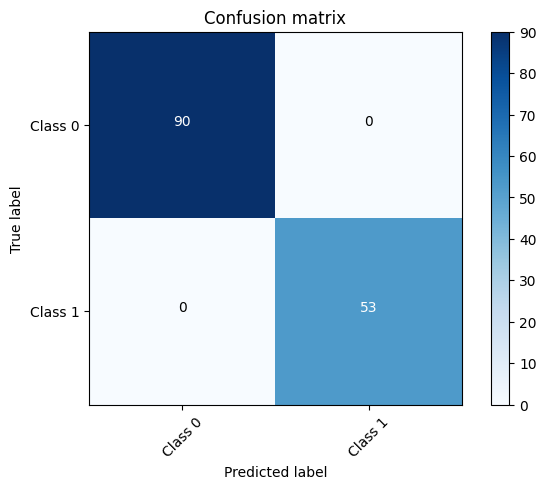

In [147]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'random_search_cv_clf' from your previous code is what you intended to use
grid_search = random_search_cv_clf

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Retrain the best estimator on the entire dataset used for the original training
# Assuming 'X_scaled' and 'y' were used for the initial training
grid_search.best_estimator_.fit(X_scaled, y)

# Now predict using the retrained model and the correct test set with 30 features
# Assuming 'X_test' is the correct test set corresponding to 'X_scaled'
y_pred_p = y_pred3 = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_p)  # Use the corresponding y_test

# Now you can plot the confusion matrix
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1']) # Replace with your actual class names
plt.show()